In [13]:
# # https://github.com/PaddlePaddle/PaddleOCR/blob/release/2.7/doc/doc_en/quickstart_en.md
# # https://www.paddlepaddle.org.cn/documentation/docs/en/install/pip/linux-pip_en.html#installation-step
# !pip install common dual tight data prox
# !pip install paddlepaddle
# !pip install paddleocr

In [4]:
import paddle
paddle.utils.run_check()

Running verify PaddlePaddle program ... 
PaddlePaddle works well on 1 CPU.
PaddlePaddle is installed successfully! Let's start deep learning with PaddlePaddle now.


# OCR with PaddlePaddle/PaddleOCR
- https://github.com/PaddlePaddle/PaddleOCR
- https://pypi.org/project/paddleocr/

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from paddleocr import PaddleOCR, draw_ocr


In [71]:
# Load the OCR model
model = PaddleOCR(use_angle_cls=True, lang='en', use_gpu=False, show_log=False)

In [6]:
# Load the image
img_path = '../_data/resource/note_child.jpg'
img = cv2.imread(img_path, cv2.IMREAD_COLOR)

# Noise removal

In [7]:
# Load the image
img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

kernel = np.ones((2, 2))

# Apply Gaussian blur to reduce noise before Canny
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Apply Canny Edge Detector
edges = cv2.Canny(blurred, 50, 150)

# Dilate the edges to make text regions more contiguous
dilated = cv2.dilate(edges, kernel, iterations=1)

# Find and fill contours
contours, _ = cv2.findContours(dilated, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
filled = cv2.drawContours(np.zeros_like(img), contours, -1, (255, 255, 255), thickness=cv2.FILLED)

# Dilate agine
img_dilated = cv2.dilate(filled, kernel, iterations=1)

# Sharpen the image
sharpen_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
sharpened = cv2.filter2D(img_dilated, -1, sharpen_kernel)

image = sharpened

### Ensure image has right properties

In [8]:
# ensure image is not grayscale
if image.ndim == 2: # Is image grayscale?
    rgb_image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
else:
    rgb_image = image

## Plot all images

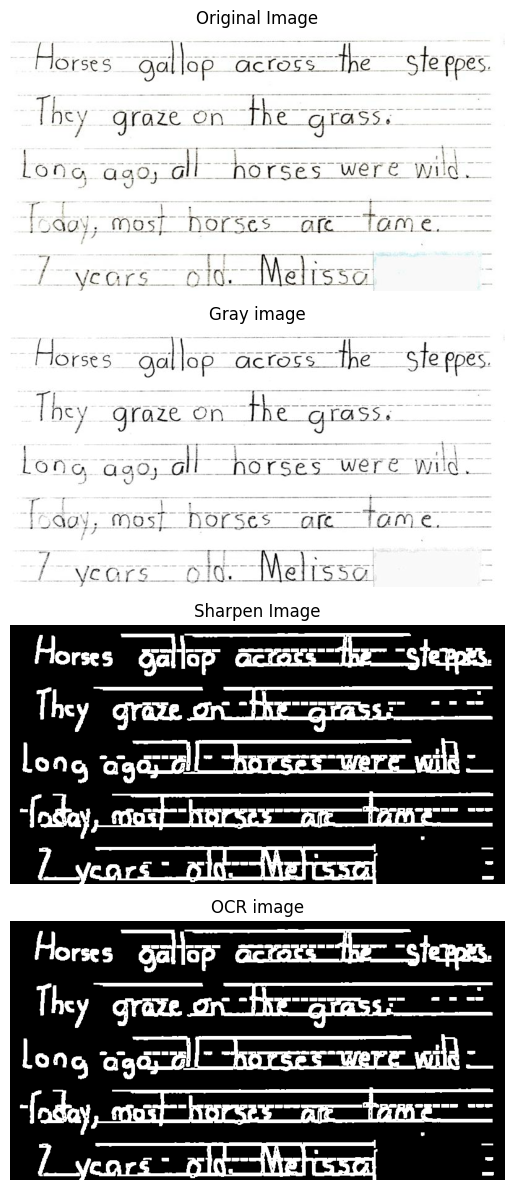

In [9]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(4, 1, figsize=(12, 12)) # 1 row, 3 columns

# Display each image in a subplot and set titles
axs[0].imshow(img)
axs[0].set_title('Original Image')

axs[1].imshow(img_gray, 'gray')
axs[1].set_title('Gray image')

axs[2].imshow(sharpened)
axs[2].set_title('Sharpen Image')

axs[3].imshow(rgb_image)
axs[3].set_title('OCR image')

# Turn off the axes for all subplots in one go
for ax in axs:
    ax.axis('off')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

## Perform OCR on np array

In [34]:
# OCR from image path
res_doc = model.ocr(img_path, cls=False)

In [35]:
# OCR from image
res_image = model.ocr(rgb_image, cls=False)

## OCR result

In [36]:
# res_doc
for idx in range(len(res_doc)):
    res = res_doc[idx]
    for line in res:
        print(line)

[[[28.0, 197.0], [310.0, 205.0], [309.0, 251.0], [27.0, 243.0]], ('6noagojo', 0.578961968421936)]
[[[354.0, 210.0], [742.0, 206.0], [742.0, 234.0], [354.0, 237.0]], ('horseswerewild.', 0.906678318977356)]
[[[29.0, 294.0], [465.0, 292.0], [465.0, 329.0], [29.0, 331.0]], ('foaaymos norses', 0.848047137260437)]
[[[556.0, 295.0], [686.0, 295.0], [686.0, 322.0], [556.0, 322.0]], ('Tame', 0.8962387442588806)]
[[[422.0, 368.0], [581.0, 374.0], [580.0, 409.0], [421.0, 404.0]], ('Aetiss0', 0.7063995599746704)]
[[[109.0, 384.0], [223.0, 384.0], [223.0, 409.0], [109.0, 409.0]], ('Veors', 0.7995780110359192)]


In [37]:
# res_image
for idx in range(len(res_image)):
    res = res_image[idx]
    for line in res:
        print(line)

[[[204.0, 39.0], [337.0, 34.0], [339.0, 80.0], [206.0, 85.0]], ('gallop', 0.8334312438964844)]
[[[660.0, 39.0], [768.0, 43.0], [767.0, 72.0], [659.0, 68.0]], ('Te a', 0.6575817465782166)]
[[[41.0, 102.0], [134.0, 109.0], [129.0, 168.0], [36.0, 161.0]], ('They', 0.9848634004592896)]
[[[160.0, 122.0], [488.0, 103.0], [491.0, 154.0], [163.0, 173.0]], ('graze on -tkrs--', 0.8446736335754395)]
[[[20.0, 195.0], [299.0, 203.0], [298.0, 259.0], [19.0, 251.0]], ('Long agojd', 0.8799955248832703)]
[[[362.0, 215.0], [642.0, 209.0], [642.0, 233.0], [362.0, 238.0]], ('Dorsxwere', 0.8917363286018372)]


## Visualize

In [72]:
font_path = '../_data/resource/latin.ttf'

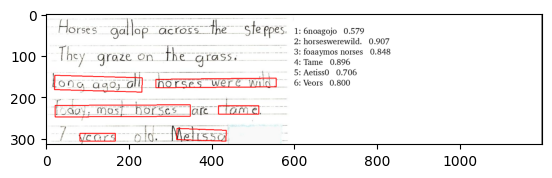

In [75]:
result = res_doc[0]
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
annotated = draw_ocr(img, boxes, txts, scores, font_path=font_path)

plt.imshow(annotated)
plt.show()

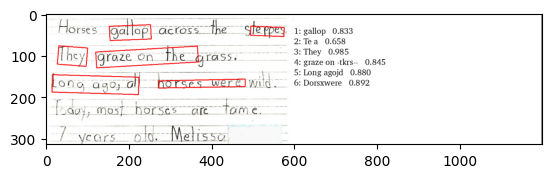

In [77]:
result = res_image[0]
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
annotated = draw_ocr(img, boxes, txts, scores, font_path=font_path)

plt.imshow(annotated)
plt.show()